In [3]:
import pandas as pd

df = pd.read_csv('EV.csv')

df.head()    

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.shape

(112634, 17)

In [23]:
print("Unique values per column:")
print(df.nunique())


Unique values per column:
VIN (1-10)                                             7548
County                                                  165
City                                                    629
State                                                    45
Postal Code                                             773
Model Year                                               20
Make                                                     34
Model                                                   114
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          101
Base MSRP                                                30
Legislative District                                     49
DOL Vehicle ID                                       112634
Vehicle Location                                        758
Electric Utility                                         73
2020 Census Tr

In [76]:
missing_values = df.isnull().sum()
print(missing_values)


VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [77]:
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'UNKNOWN'))
df['Legislative District'].fillna(-1, inplace=True)
df['Vehicle Location'] = df.apply(lambda row: '0,0' if pd.isnull(row['Vehicle Location']) else row['Vehicle Location'], axis=1)
df['Electric Utility'].fillna('UNKNOWN', inplace=True)


In [80]:
df= df.copy()
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,-1.0,198968248,POINT (-81.80023 24.5545),UNKNOWN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,-1.0,5204412,POINT (-114.57245 35.16815),UNKNOWN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [79]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.727382,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.763497,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,-1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


## Univariate Analysis

#### Numerical columns

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


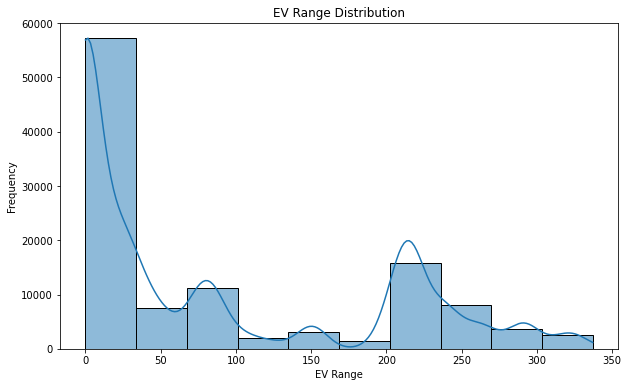

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EV range distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=10, kde=True)
plt.title('EV Range Distribution')
plt.xlabel('EV Range')
plt.ylabel('Frequency')
plt.show()

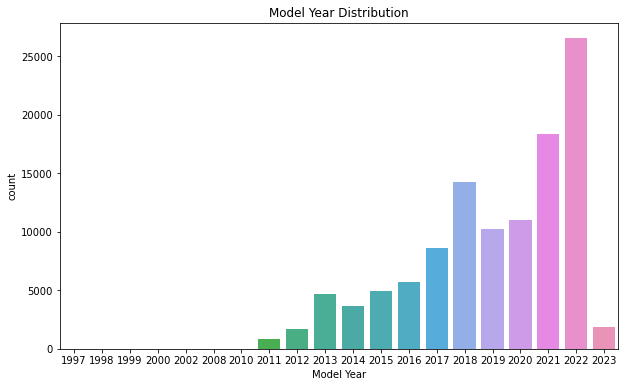

In [9]:
#distribution of model years
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=df)
plt.title('Model Year Distribution')
plt.show()

#### Categorical Columns

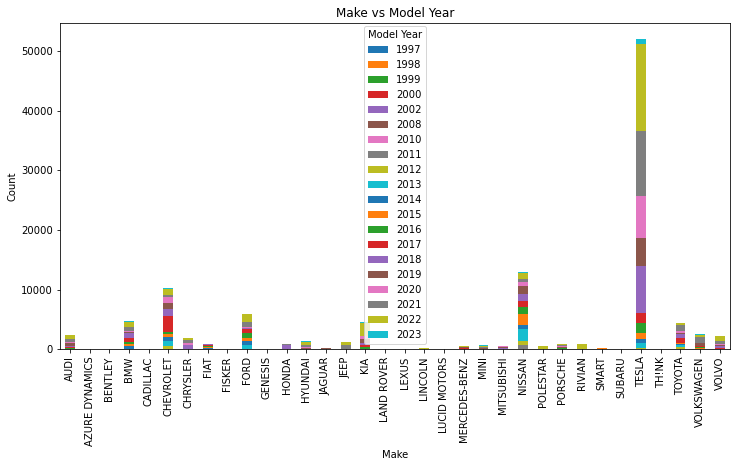

In [81]:
# Cross-tabulation of Make and Model Year
crosstab = pd.crosstab(df['Make'], df['Model Year'])
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Make vs Model Year')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

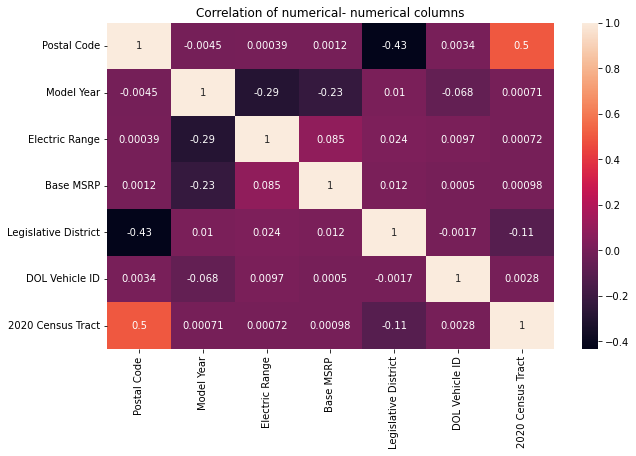

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation of numerical- numerical columns')
plt.show()

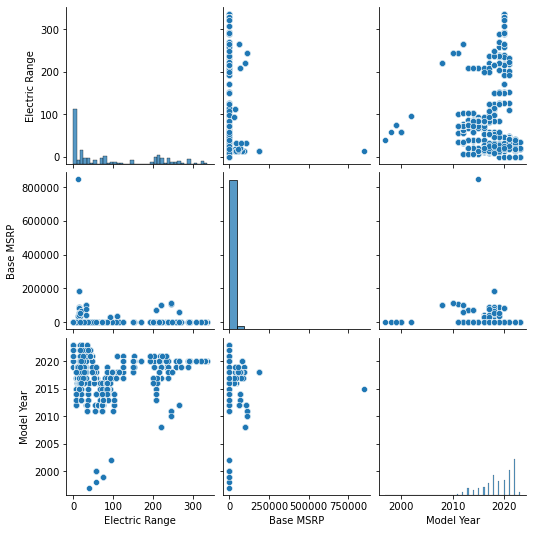

In [14]:
sns.pairplot(df[['Electric Range', 'Base MSRP', 'Model Year']])
plt.show()

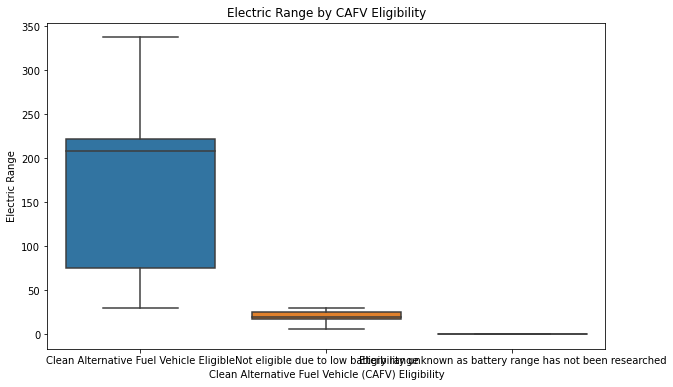

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=df)
plt.title('Electric Range by CAFV Eligibility')
plt.show()

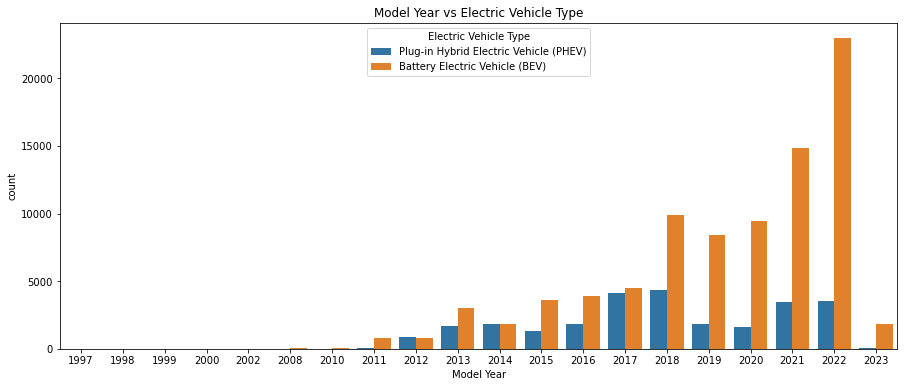

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Model Year', hue='Electric Vehicle Type', data=df)
plt.title('Model Year vs Electric Vehicle Type')
plt.show()

### Choropeth Plot

In [35]:
import plotly.express as px
state_agg = df.groupby('State').size().reset_index(name='Vehicle Count')
print(state_agg)

   State  Vehicle Count
0     AK              1
1     AL              1
2     AR              4
3     AZ              6
4     CA             76
5     CO              9
6     CT              6
7     DC              6
8     DE              1
9     FL              6
10    GA              7
11    HI              4
12    ID              2
13    IL              6
14    KS              3
15    KY              1
16    LA              3
17    MA              3
18    MD             26
19    ME              1
20    MN              1
21    MO              3
22    MS              1
23    NC              7
24    ND              1
25    NE              5
26    NH              2
27    NJ              3
28    NM              1
29    NV              8
30    NY              4
31    OH              2
32    OK              1
33    OR              5
34    PA              3
35    RI              1
36    SC              5
37    SD              1
38    TN              3
39    TX             14
40    UT        

In [38]:
# Choropleth using plotly express
fig = px.choropleth(
    state_agg,
    locations='State',  
    locationmode='USA-states',  
    color='Vehicle Count', 
    hover_name='State',  
    color_continuous_scale='Plasma', 
    scope='usa', 
    labels={'Vehicle Count': 'Number of EV Vehicles'},  
    title='Number of EV Vehicles by State'
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)'  
    )
)

fig.show()

## Racing Bar plot

In [47]:
pip install bar_chart_race 


Note: you may need to restart the kernel to use updated packages.


In [53]:
import bar_chart_race as bcr
print(bcr.__version__)


0.1.0


In [54]:
pip install --upgrade bar-chart-race

Note: you may need to restart the kernel to use updated packages.


In [84]:
make_year_counts = df.groupby(['Make', 'Model Year']).size().reset_index(name='Count')
make_year_counts

,Make,Model Year,Count
0,AUDI,2016,214
1,AUDI,2017,187
2,AUDI,2018,174
3,AUDI,2019,392
4,AUDI,2020,224
...,...,...,...
204,VOLVO,2019,190
205,VOLVO,2020,162
206,VOLVO,2021,580
207,VOLVO,2022,882


In [85]:

# Create a Racing Bar Plot
fig = px.bar(
    make_year_counts,
    x='Count',
    y='Make',
    color='Make',
    animation_frame='Model Year',  # Column to animate over
    range_x=[0, make_year_counts['Count'].max() + 5],  # Adjust x-axis range
    title='Sales of Electric Vehicles Make Year wise ',
    labels={'Count': 'Number of EVs'},
    orientation='h'  # Horizontal bar plot
)

fig.update_layout(
    xaxis_title='Count of EVs',
    yaxis_title='EV Make',
    title_font=dict(size=20),
    showlegend=False  
)

fig.show()